# FACE MASK DETECTION

So in this Face Mask Detection I will convert all the images of with_mask and without_mask into array so that with those array we will create a deep learning model. Firstly the input image is processed as an array after that the array is send that into the MobileNet and then we will do the MaxPooling and then we will flatten it and create a fully connected layer and give the output. 

## Importing the Libraries

In [1]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import imutils
import time

In [4]:
directory = r"dataset"
categories = ["with_mask", "without_mask"]

## Number of images with and without mask

In [5]:
print("The number of images with facemask labelled 'with mask':",len(os.listdir('dataset/with_mask')))
print("The number of images with facemask labelled 'without mask':",len(os.listdir('dataset/without_mask')))

The number of images with facemask labelled 'with mask': 1915
The number of images with facemask labelled 'without mask': 1918


In [6]:
img1= os.listdir('dataset/with_mask')
img2= os.listdir('dataset/without_mask')

In [7]:
with_mask = len(os.listdir('dataset/with_mask'))
without_mask = len(os.listdir('dataset/without_mask'))

In [8]:
img1[1]

'0_0_0 copy 10.jpg'

## Plot to show the number of images with and without mask

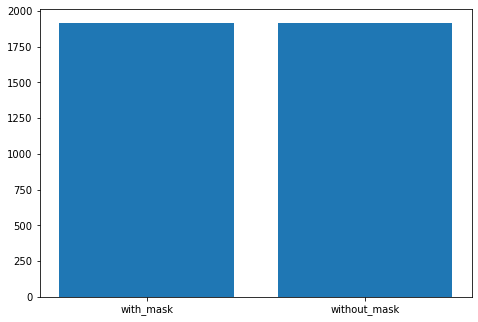

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['with_mask', 'without_mask',]
y = [with_mask, without_mask]
ax.bar(x,y)
plt.show()

### Observation
1. There are almost equal number of images with and without mask.
2. The number of images with facemask and without facemark are around 1900.

([<matplotlib.patches.Wedge at 0x237dfea8b20>,
 [Text(-1.099999168699198, 0.0013523539011687654, 'with mask'),
  Text(1.1999990932645195, -0.001475182812888012, 'without mask')],
 [Text(-0.5999995465631988, 0.0007376475824556901, '50.0%'),
  Text(0.6999994710709696, -0.0008605233075180068, '50.0%')])

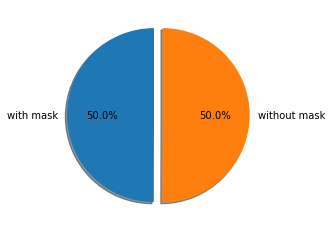

In [24]:
labels = 'with mask', 'without mask'
sizes = [with_mask,without_mask]

fig1, ax1 = plt.subplots()
explode = (0, 0.1) 
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)

### Observation
This plot shows that there are equal ratio of images with and without mask.

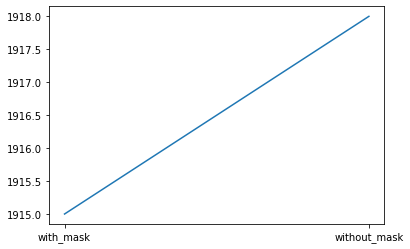

In [25]:
# x = ['with_mask', 'without_mask',]
y = [with_mask, without_mask]
plt.plot(x,y)

### Observation
There is a very small difference in the number of with_mask and without_mask.

## Data Preprocessing

In [42]:
init_lr = 1e-4
epochs = 20
bs = 32

### Observation
When initial learning rate is less it will give more accuracy.

In [43]:
print("[info] loading images...")

[info] loading images...


In [44]:
data = []
labels = []

### Observation
I have created two empty list data and labels in this I am going to append all the image array with or without mask indicating whether those images are with_mask or without_mask.

In [45]:
for category in categories:
    path = os.path.join(directory, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        
        data.append(image)
        labels.append(category)


C:\Users\admin\anaconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


### Observation
First we will look in with_mask and without_mask and once we get the path, we are going to os.listdir(path) i.e. what this listdir it kind of list down all the images inside that particular directory.So inside with_mask there are around 1900 images which will be listed by particular os,listdir() method and after that I am going to join the path of with_mask to image after that load_img function will call and it has come from Keras.preprocessing image and this load_img actually load the img path and target size is the hieght and weight of the image. Converting all the images uniformlly so that the model will be perfect in that shape and then once the img is load it is saved it to the variable name 'image' and then I am going to convert that img to an array . Once we have convert the image to array and preprocess the input successfully then we need to append the img which is an array to the data list and we need to append the corresponding labels inside the label list. 

In [46]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

### Observation
So now we have all the datas in numerical values but the labels are still alphabet values like with_mask or without_mask but these text character will not be useful for us so we are going to convert that one hot array so in order to do that we are calling the LabelBinarizer() method so which is coming from the sklearn.preprocessing module so with that I am  going to convert the with_mask and without_mask into categorical variable i.e. 0 and 1. 

In [47]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

### Observation
In this I am converting the data and labels into numpy array by using np.array.

In [48]:
(train_X, test_X, train_Y, test_Y) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

### Observation
In this I am using train and test split to split my training and testing data in this 20% of the images is going to the test size and 80% of the img for training. So this is all about the preprocessing.

In [49]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

### Observation
ImageDataGenerator is that it creates many image with single image by adding various properties like flipping, shifting and many other properties.

In [50]:
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [51]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [52]:
model = Model(inputs=baseModel.input, outputs=headModel)

### Observation
Now modeling part so by using MobileNetV2 we are creating a base model here, so once the base model is done. Next is to construct the fully connected layer by using pooling and other. So the output is of two layers i.e. one is for with_mask and another for without_mask. 

In [53]:
for layer in baseModel.layers:
    layer.trainable = False

In [54]:
print("[INFO] compiling model...")
opt = Adam(lr=init_lr, decay=init_lr / epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


## Observation
This step is the main step where we fit our images in the training set and the test set to our Sequential model we built using keras library. I have trained the model for 20 epochs (iterations). However, we can train for more number of epochs to attain higher accuracy lest there occurs over-fitting.

In [55]:
print("[INFO] training head...")
H = model.fit(
    aug.flow(train_X, train_Y, batch_size=bs),
    steps_per_epoch=len(train_X) // bs,
    validation_data=(test_X, test_Y),
    validation_steps=len(test_X) // bs,
    epochs=epochs)


[INFO] training head...
Epoch 1/20
95/95 [==============================] - 135s 1s/step - loss: 0.5313 - accuracy: 0.7671 - val_loss: 0.1420 - val_accuracy: 0.9752
Epoch 2/20
95/95 [==============================] - 123s 1s/step - loss: 0.1503 - accuracy: 0.9673 - val_loss: 0.0773 - val_accuracy: 0.9883
Epoch 3/20
95/95 [==============================] - 129s 1s/step - loss: 0.1022 - accuracy: 0.9713 - val_loss: 0.0540 - val_accuracy: 0.9909
Epoch 4/20
95/95 [==============================] - 125s 1s/step - loss: 0.0764 - accuracy: 0.9815 - val_loss: 0.0454 - val_accuracy: 0.9935
Epoch 5/20
95/95 [==============================] - 130s 1s/step - loss: 0.0623 - accuracy: 0.9830 - val_loss: 0.0395 - val_accuracy: 0.9935
Epoch 6/20
95/95 [==============================] - 130s 1s/step - loss: 0.0536 - accuracy: 0.9863 - val_loss: 0.0353 - val_accuracy: 0.9948
Epoch 7/20
95/95 [==============================] - 127s 1s/step - loss: 0.0557 - accuracy: 0.9846 - val_loss: 0.0315 - val_accura

### Observation 
We see that after the 20th epoch, our model has an accuracy of 99.59% with the training set and an accuracy of 99.35% with the test set. This implies that it is well trained without any over-fitting. 

After epoch we need to evaluate our network by using the model.predict method.

In [56]:
print("[INFO] evaluating network...")
predIdxs = model.predict(test_X, batch_size=bs)

[INFO] evaluating network...


### Observation 
For each image in the testing set we need to find the index of the label with corresponding largest predicted probability by using np.argmax method.

In [57]:
predIdxs = np.argmax(predIdxs, axis=1)

In [58]:
print(classification_report(test_Y.argmax(axis=1), predIdxs, target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



### Observation
Showing a nicely formatted classification report

In [59]:
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

[INFO] saving mask detector model...


### Observation
Now we are saving our model that we are generate in h5 format.

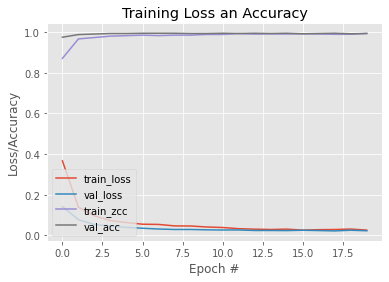

In [60]:
#Plot the training loss and accuracy using matplotlib
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_zcc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss an Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

### Observation
From this plot we can say that our loss is also being reduced and accuracy is good nearly 99%.So we got a very good model here.

In [ ]:
def detect_and_predict_mask(frame, faceNet, maskNet):
    # grab the dimensions of the frame and then construct a blob from it
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),(104.0, 177.0, 123.0))

    # pass the blob through the network and obtain the face detections
    faceNet.setInput(blob)
    detections = faceNet.forward()
    print(detections.shape) 
    # initialize our list of faces, their corresponding locations,and the list of predictions from our face mask network
    faces = []
    locs = []
    preds = []
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the detection
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the confidence is greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for the object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # ensure the bounding boxes fall within the dimensions of the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            # extract the face ROI, convert it from BGR to RGB channel ordering, resize it to 224x224, and preprocess it
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)

            # add the face and bounding boxes to their respective lists
            faces.append(face)
            locs.append((startX, startY, endX, endY))

    # only make a predictions if at least one face was detected
    if len(faces) > 0:
        # for faster inference we'll make batch predictions on *all*
        # faces at the same time rather than one-by-one predictions
        # in the above `for` loop
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)

    # return a 2-tuple of the face locations and their corresponding
    # locations
    return (locs, preds)

# load our serialized face detector model from disk
prototxtPath = r"face_detector\deploy.prototxt"
weightsPath = r"face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector model from disk
maskNet = load_model("mask_detector.model")

# initialize the video stream
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 400 pixels
    frame = vs.read()
    frame = imutils.resize(frame, width=400)

    # detect faces in the frame and determine if they are wearing a
    # face mask or not
    (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

    # loop over the detected face locations and their corresponding
    # locations
    for (box, pred) in zip(locs, preds):
        # unpack the bounding box and predictions
        (startX, startY, endX, endY) = box
        (mask, withoutMask) = pred

        # determine the class label and color we'll use to draw the bounding box and text
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # include the probability in the label
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        # display the label and bounding box rectangle on the output
        # frame
        cv2.putText(frame, label, (startX, startY - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

    # show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] starting video stream...
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 2

(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200

(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200

(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200

(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200

(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200

### Observation
In this step we detect the face by using camera operations of open cv2 so we import open cv2 .In this we download the files in order to detect the faces and make a folder of face detector.In this we use facenet (couple of files) which is used for face detection which is inside face detector folder.Now we are giving file path in variable named as prototxtPath and weightPath.Now to use the files we are using readNet method which is under cv2 and the module called dnn which means deep neural network.Now we load the model using load model which are using for mask detection.Now we need to load the camera so we are using VideoStream.In this src is for the camera which we are using and the start loads the camera.Now we are using while loop in which we are reading the frame.In this we are using function detect and predict which returning two values locs and preds.Locs  is for x nad y coordinate of rectangle surrounding the face and preds is to finding the accuracy of person wearing the mask or not.There are labels which is used to show a person wearing a mask or not.In this we are using a BGR color concept. Color G  if label=mask and for label=without mask Color Blue.With label percentage of accuracy is also shown there.